# Data Analysis agent with report generation

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import sys

current_path = os.getcwd()  # Current working directory
root_path = os.path.abspath(os.path.join(current_path, os.pardir))
sys.path.append(root_path)

In [3]:
from langgraph.graph import END, StateGraph, START

from src.utils.models import GraphState
from src.nodes import (
    summarization_node,
    grade_query,
    grade_visualization_requirement,
    data_query_node,
    chart_node,
    report_node,
)

In [4]:
workflow = StateGraph(GraphState)

In [5]:
workflow.add_node("summarize_data", summarization_node)
workflow.add_node("report_node", report_node)
workflow.add_node("grade_query", grade_query)
workflow.add_node("grade_visualization_requirement", grade_visualization_requirement)
workflow.add_node("data_query_node", data_query_node)
workflow.add_node("chart_node", chart_node)

In [6]:
from src.tools import decide_to_continue, decide_to_visualize, decide_to_report

In [7]:
workflow.add_edge(START, "summarize_data")
workflow.add_conditional_edges(
    "summarize_data",
    decide_to_report,
    {
        "report": "report_node",
        "no_report": "grade_query",
    },
)
workflow.add_edge("report_node", END)
workflow.add_conditional_edges(
    "grade_query",
    decide_to_continue,
    {
        "query_not_relevant": END,
        "query_relevant": "grade_visualization_requirement",
    },
)
workflow.add_conditional_edges(
    "grade_visualization_requirement",
    decide_to_visualize,
    {
        "not_visualize": "data_query_node",
        "visualize": "chart_node",
    },
)
workflow.add_edge("data_query_node", END)
workflow.add_edge("chart_node", END)

In [8]:
# Compile the graph
app = workflow.compile()

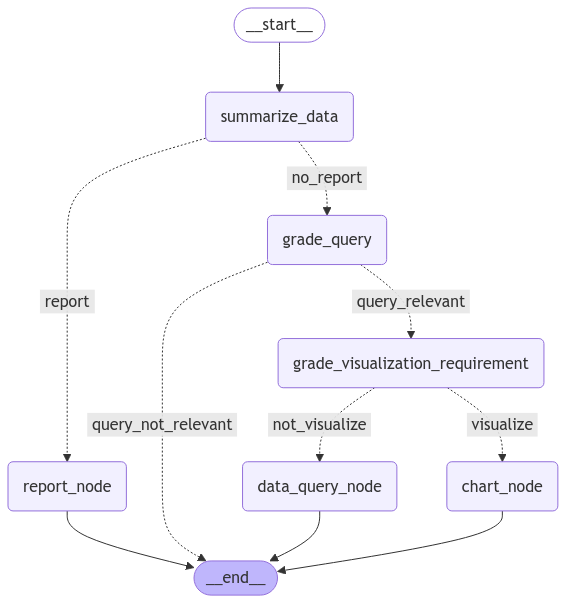

In [9]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)